In [121]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [332]:
deleak = pd.read_pickle('./data/flow_05.pkl')
preds = pd.read_pickle('data/preds3.pkl')
top15 = pd.read_pickle('./data/top15.pkl')
y_scaler = pd.read_pickle('./data/y_scaler.pkl')

In [333]:
p = np.array(preds)
pp = np.vstack([p for i in range(24)])
ppp = pp.T
desc_preds = y_scaler.inverse_transform(ppp)
desc_preds = desc_preds[:, 0]

In [334]:
top15.drop(['flow'], axis=1, inplace=True)

In [335]:
deleak_train = deleak[(deleak.index < datetime.datetime(2017, 10, 1)) & (deleak.index > datetime.datetime(2013, 12, 7))]
deleak_test  = deleak[(deleak.index > datetime.datetime(2017, 11, 30)) & (deleak.index < datetime.datetime(2019, 8, 12, 22))]


In [336]:
print(
    deleak_train.shape,
    deleak_test.shape,
    top15_train.shape,
    top15_test.shape,
    preds.shape
)

(33455, 1) (20420, 1) (33456, 12) (14876, 12) (49772,)


In [337]:
deleak_test.shape[0] + deleak_train.shape[0]

53875

In [338]:
deleak_train = deleak[deleak.index < datetime.datetime(2017, 10, 1)] 
deleak_test = deleak[deleak.index > datetime.datetime(2017, 11, 30)]

In [339]:
desc_preds_train = desc_preds[1:33457]
desc_preds_test = desc_preds[-14876:]

In [340]:
top15.resample('H').mean().shape

(49798, 12)

In [341]:
deleak.resample('H').mean().shape

(50136, 1)

In [342]:
deleak.resample('H').mean()
#new_df = top15.append(deleak, sort=True)

In [346]:
new_df = pd.concat([mse_df.resample('H').mean(), deleak.resample('H').mean()], axis=1, join='inner')

In [383]:
new_df

observations  predictions        flow
time                                                      
2013-12-07 01:00:00     26.630000    56.354168   24.076100
2013-12-07 02:00:00     22.630000    54.801537   20.196100
2013-12-07 03:00:00     20.020000    54.045757   17.664400
2013-12-07 04:00:00     19.843333    54.326111   17.493033
2013-12-07 05:00:00     23.520000    55.677315   21.059400
2013-12-07 06:00:00     33.320000    57.781693   30.565400
2013-12-07 07:00:00     54.336667    60.297215   50.951567
2013-12-07 08:00:00     83.213333    62.365311   78.961933
2013-12-07 09:00:00    100.180000    63.550190   95.419600
2013-12-07 10:00:00     97.830000    63.887241   93.140100
2013-12-07 11:00:00     90.096667    63.651840   85.638767
2013-12-07 12:00:00     86.413333    62.943470   82.065933
2013-12-07 13:00:00     78.010000    61.434074   73.914700
2013-12-07 14:00:00     73.560000    58.646782   69.598200
2013-12-07 15:00:00     73.720000    54.597675   69.753400
2013-12-07 16:00:00     75.676667    50.349220   71.651367
2013-12-07 17:00:00     74.383333    46.485477   70.396833
2013-12-07 18:00:00     67.966667    42.677910   64.172667
2013-12-07 19:00:00     60.483333    38.919872   56.913833
2013-12-07 20:00:00     54.806667    35.784908   51.407467
2013-12-07 21:00:00     47.120000    33.542305   43.951400
2013-12-07 22:00:00     42.823333    32.180527   39.783633
2013-12-07 23:00:00     39.056667    31.819559   36.129967
2013-12-08 00:00:00     34.656667    33.002750   31.861967
2013-12-08 01:00:00     27.520000    39.031067   24.939400
2013-12-08 02:00:00     22.900000    50.811199   20.458000
2013-12-08 03:00:00     20.923333    64.060020   18.540633
2013-12-08 04:00:00     19.873333    74.234413   17.522133
2013-12-08 05:00:00     21.280000    79.042671   18.886600
2013-12-08 06:00:00     28.160000    78.093872   25.560200
...                           ...          ...         ...
2019-08-11 16:00:00     75.327017    65.632889   75.327017
2019-08-11 17:00:00     80.364678    69.716072   80.364678
2019-08-11 18:00:00     90.651731    73.995537   90.651731
2019-08-11 19:00:00     90.760479    75.519028   90.760479
2019-08-11 20:00:00     82.985154    72.452187   82.985154
2019-08-11 21:00:00     74.076486    63.419952   74.076486
2019-08-11 22:00:00     58.849814    50.724663   58.849814
2019-08-11 23:00:00     44.272177    39.300632   44.272177
2019-08-12 00:00:00     31.561173    30.922073   31.561173
2019-08-12 01:00:00     27.783091    23.306568   27.783091
2019-08-12 02:00:00     25.774858    20.767374   25.774858
2019-08-12 03:00:00     26.278623    19.778164   26.278623
2019-08-12 04:00:00     30.889997    20.114355   30.889997
2019-08-12 05:00:00     50.232274    22.829029   50.232274
2019-08-12 06:00:00     92.064464    30.304554   92.064464
2019-08-12 07:00:00    102.024617    46.298096  102.024617
2019-08-12 08:00:00     96.177163    65.537926   96.177163
2019-08-12 09:00:00     89.575555    79.728477   89.575555
2019-08-12 10:00:00     88.506968    87.172592   88.506968
2019-08-12 11:00:00     84.386469    87.752785   84.386469
2019-08-12 12:00:00     78.533060    83.135925   78.533060
2019-08-12 13:00:00     75.068488    76.496239   75.068488
2019-08-12 14:00:00     71.607504    72.421509   71.607504
2019-08-12 15:00:00     73.065301    69.000824   73.065301
2019-08-12 16:00:00     73.467385    67.201584   73.467385
2019-08-12 17:00:00     78.661388    69.414948   78.661388
2019-08-12 18:00:00     87.424482    72.319099   87.424482
2019-08-12 19:00:00     89.410198    73.365990   89.410198
2019-08-12 20:00:00     78.052463    71.216499   78.052463
2019-08-12 21:00:00     71.139289    64.590294   71.139289

[49772 rows x 3 columns]

In [347]:
new_df.dropna(axis=0, how='any', inplace=True)

In [354]:
print(desc_preds.shape, new_df.flow.shape)

(49772,) (49772,)


In [384]:
MSE = [(new_df.flow[i] - new_df.predictions[i])**2 for i in range(desc_preds.shape[0])]

In [385]:
np.mean(np.sqrt(MSE[1000:]))

10.866117349818014

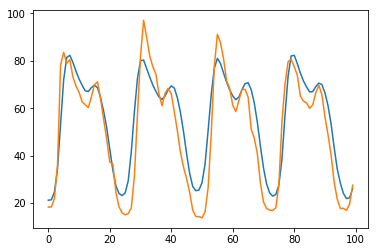

In [358]:
plt.plot(desc_preds[3000:3100])
plt.plot(np.array(new_df.flow[3001:3101]))

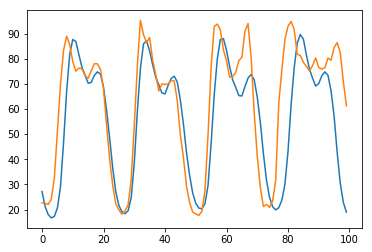

In [379]:
plt.plot(desc_preds[3000+24*7*15:3100+24*7*15])
plt.plot(np.array(new_df.flow[3000+24*7*15:3100+24*7*15]))

In [361]:
mse_df = pd.DataFrame(np.sqrt(MSE))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


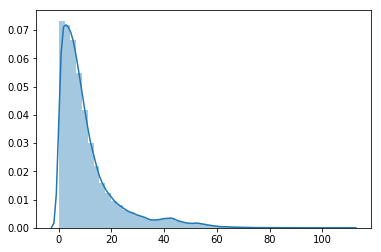

In [362]:
import seaborn
seaborn.distplot(mse_df)

In [364]:
MAE = [abs((new_df.flow[i] - desc_preds[i])) for i in range(desc_preds.shape[0])]

In [365]:
mae_df = pd.DataFrame(MAE)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


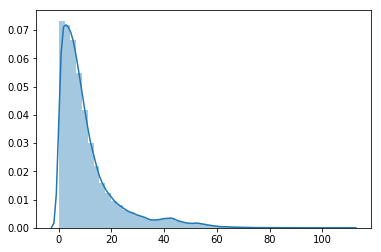

In [366]:
seaborn.distplot(mae_df)

In [370]:
mse_dict = {
    'time' : list(new_df.index),
    'observations' : list(new_df.flow),
    'predictions' : list(desc_preds)
}

In [371]:
mse_df = pd.DataFrame.from_dict(mse_dict)

In [372]:
mse_df.set_index('time', inplace=True)

In [373]:
mse_df = mse_df[(mse_df.index < datetime.datetime(2017, 10, 1)) | (mse_df.index > datetime.datetime(2017, 11, 30))]

In [206]:
#mse_df.dropna(axis=0, how='any', inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
mse_daily = mse_df.resample('Y').sum()

In [375]:
mse_daily

observations    predictions
time                                    
2013-12-31   31762.336195   33986.824829
2014-12-31  483000.670590  487949.144672
2015-12-31  475031.776930  485803.447224
2016-12-31  503148.544895  489202.128153
2017-12-31  402966.994403  407099.988588
2018-12-31  500768.146785  486433.906305
2019-12-31  345893.624929  295381.337444

In [326]:
mse_daily['error'] = mse_daily.observations - mse_daily.predictions

In [328]:
mse_daily['error_h'] = mse_daily.error / (12*30*24)

In [329]:
mse_daily

observations    predictions          error    error_h
time                                                              
2013-12-31   33828.434222   33986.824829    -158.390607  -0.018332
2014-12-31  513788.114010  487949.144672   25838.969337   2.990621
2015-12-31  601331.147408  485803.447224  115527.700185  13.371262
2016-12-31  585176.069780  489202.128153   95973.941627  11.108095
2017-12-31  501564.156124  486827.045891   14737.110233   1.705684
2018-12-31  582208.281489  486433.906305   95774.375184  11.084997
2019-12-31  345893.624929  295381.337444   50512.287485   5.846330

In [386]:
mse_daily = new_df.resample('D').sum()

In [388]:
mse_daily['error'] = mse_daily.flow - mse_daily.predictions

In [394]:
mse_daily.error.mean()

9.833924502482478